In [5]:
#Name: Nguyen Si Nguyen
#UCLA_ID: 004870721

#Problem 2 - AttractiveNess
not.installed = function(package_name)  !is.element(package_name, installed.packages()[,1])
if (not.installed("mice")) install.packages("mice" , repos="http://cran.rstudio.com/")
if (not.installed("VIM")) install.packages("VIM" , repos="http://cran.rstudio.com/")    
if (not.installed("ranger")) install.packages("ranger" , repos="http://cran.rstudio.com/")        
if (not.installed("e1071")) install.packages("e1071" , repos="http://cran.rstudio.com/")        
if (not.installed("gbm")) install.packages("gbm" , repos="http://cran.rstudio.com/")    
if (not.installed("pROC")) install.packages("pROC" , repos="http://cran.rstudio.com/")      
if (not.installed("ranger")) install.packages("ranger" , repos="http://cran.rstudio.com/")      

    
library(mice)
library(VIM)
library(lattice)
library(ggplot2)
library(ranger)    
library(e1071)        
library(gbm)
library(caret)
library(pROC)
library(ranger)
    
MY_UID = 004870721

set.seed( MY_UID )



Loading required package: colorspace
Loading required package: grid
Loading required package: data.table
VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: ‘VIM’

The following object is masked from ‘package:datasets’:

    sleep

Loading required package: survival
Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3

Attaching package: ‘caret’

The following object is masked from ‘package:survival’:

    cluster

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following object is masked from ‘package:colorspace’:

    coords

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [6]:
pMiss = function(x){sum(is.na(x))/length(x)*100}

In [7]:
data_training = read.csv("facestat_train.csv")

In [8]:
apply(data_training,2,pMiss)

talented              security               haircut 
                99.15                 99.60                 99.00 
   sexual_orientation            attractive              dogfight 
                90.85                  8.45                 97.40 
               weight political_affiliation                 rehab 
                50.40                 69.40                 99.70 
      plastic_surgery           intoxicated                wealth 
                99.50                 76.35                 85.85 
             age_well                outfit           trustworthy 
                99.50                 99.50                 58.00 
           dress_size                  hire          intelligence 
                99.60                 99.35                 30.70 
                  age                  male 
                 0.00                  0.00

In [9]:
#apply(data_training, 2, function(x) sum(is.na(x)))

Assuming that the data are missing at random. Looking at the dataset above, it seems that it has a lot of missing values (talented: 99% missing, security: 99% missing, haircut: 99% missing, sexiual_orientation: 90%, etc...)

Therefore, the following columns with more than 50% missing values will be dropped since we don't have much use of them.<br>
<b>talented, security, sexual_orientation, haircut, dogfight, rehab, plastic_surgery, age_well, outfit, dress_size, hire, intoxicated, wealth



</b><br>




In [10]:
data_training_1 = within(data_training, rm(
                                            talented
                                           , security
                                           , sexual_orientation
                                           , haircut
                                           , rehab
                                           , plastic_surgery
                                           , age_well
                                           , outfit
                                           , dress_size
                                           , hire
                                           , political_affiliation
                                           , dogfight
    
#                                              , intoxicated
#                                             , wealth
#                                             , trustworthy
#                                             , weight
#                                             , intelligence
                                        )
                        )




# 	var	rel.inf
# attractive	attractive	33.110942
# trustworthy	trustworthy	20.200264
# outfit	outfit	11.790350
# age	age	9.641294
# age_well	age_well	8.351570
# sexual_orientation	sexual_orientation	4.082451
# weight	weight	2.918561
# wealth	wealth	2.468422
# intelligence	intelligence	2.340253
# dogfight	dogfight	2.253088
# intoxicated	intoxicated	1.542308
# political_affiliation	political_affiliation	1.300497
# talented	talented	0.000000
# security	security	0.000000
# haircut	haircut	0.000000
# rehab	rehab	0.000000
# plastic_surgery	plastic_surgery	0.000000
# dress_size	dress_size	0.000000
# hire	hire	0.000000

In [11]:
head(data_training_1)

attractive,weight,intoxicated,wealth,trustworthy,intelligence,age,male
2.777778,2.750000,2.444444,NA,2.571429,3.100000,19.70000,FALSE
2.720000,3.100000,2.550000,2.9,2.580000,3.100000,26.10000,FALSE
2.181818,NA,NA,NA,2.666667,3.666667,29.92308,TRUE
2.441176,2.833333,NA,NA,NA,3.708333,37.33333,FALSE
1.900000,NA,NA,NA,2.727273,NA,22.55555,FALSE
NA,3.300000,NA,NA,NA,NA,16.58333,FALSE


In [12]:
apply(data_training_1,2,pMiss)

attractive       weight  intoxicated       wealth  trustworthy intelligence 
        8.45        50.40        76.35        85.85        58.00        30.70 
         age         male 
        0.00         0.00

In [13]:
md.pattern(data_training_1)

,age,male,attractive,intelligence,weight,trustworthy,intoxicated,wealth,
260,1,1,1,1,1,1,1,1,0
1,1,1,1,1,0,1,1,1,1
3,1,1,1,1,1,1,0,1,1
158,1,1,1,1,1,1,1,0,1
1,1,1,1,1,1,0,1,1,1
2,1,1,1,1,0,1,0,1,2
4,1,1,1,1,0,1,1,0,2
36,1,1,1,1,1,1,0,0,2
1,1,1,1,1,1,0,0,1,2
1,1,1,1,0,1,1,1,0,2


In [14]:
data_training_1_drop_na = na.omit(data_training_1)
head(data_training_1_drop_na)

,attractive,weight,intoxicated,wealth,trustworthy,intelligence,age,male
2,2.720000,3.100000,2.550000,2.9,2.580000,3.100000,26.1,FALSE
33,2.360000,2.400000,2.700000,3.3,2.580000,3.100000,32.9,FALSE
53,2.240000,2.200000,2.100000,2.9,2.490000,3.500000,19.3,TRUE
65,2.763636,3.181818,2.090909,3.3,2.609091,3.181818,27.0,TRUE
66,2.120000,2.500000,2.100000,3.6,2.400000,2.800000,34.4,TRUE
80,2.600000,3.000000,2.100000,2.9,2.490000,2.900000,28.6,FALSE



 Variables sorted by number of missings: 
     Variable  Count
       wealth 0.8585
  intoxicated 0.7635
  trustworthy 0.5800
       weight 0.5040
 intelligence 0.3070
   attractive 0.0845
          age 0.0000
         male 0.0000


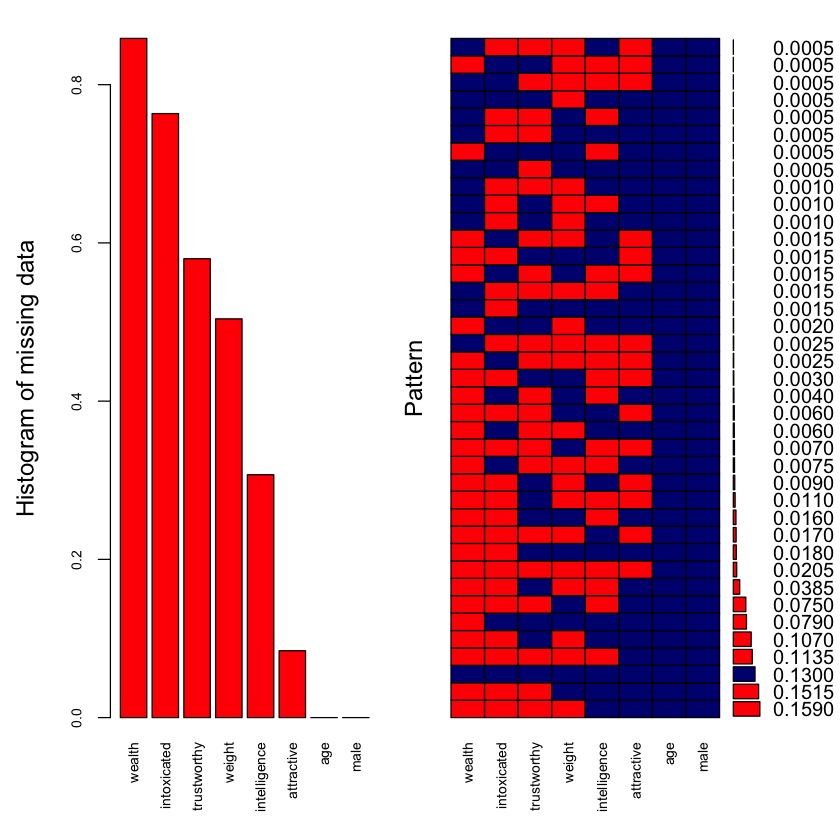

In [16]:
library(VIM)
aggr_plot = aggr(data_training_1, col=c('navyblue','red'),
                  numbers=TRUE, sortVars=TRUE,
                  labels=names(data),
                  cex.axis=.7,
                  gap=3,
                  ylab=c("Histogram of missing data","Pattern"))

In [17]:
#marginplot(data_training_1[c(1,2)])

Now, we can start imputing the missing data.

In [18]:
temp_training_Data = mice(data_training_1,m=5,maxit=50,meth='pmm',seed=MY_UID)
#summary(tempData)


 iter imp variable
  1   1  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  1   2  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  1   3  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  1   4  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  1   5  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  2   1  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  2   2  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  2   3  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  2   4  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  2   5  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  3   1  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  3   2  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  3   3  attractive  weight  intoxicated  wealth  trustworthy  intel

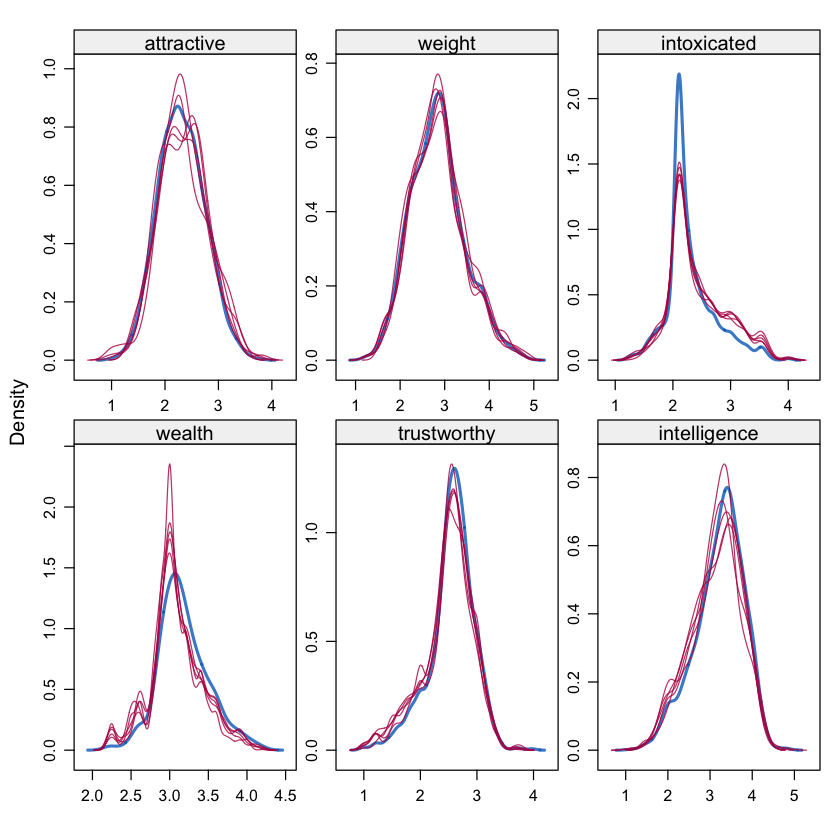

In [19]:
densityplot(temp_training_Data)

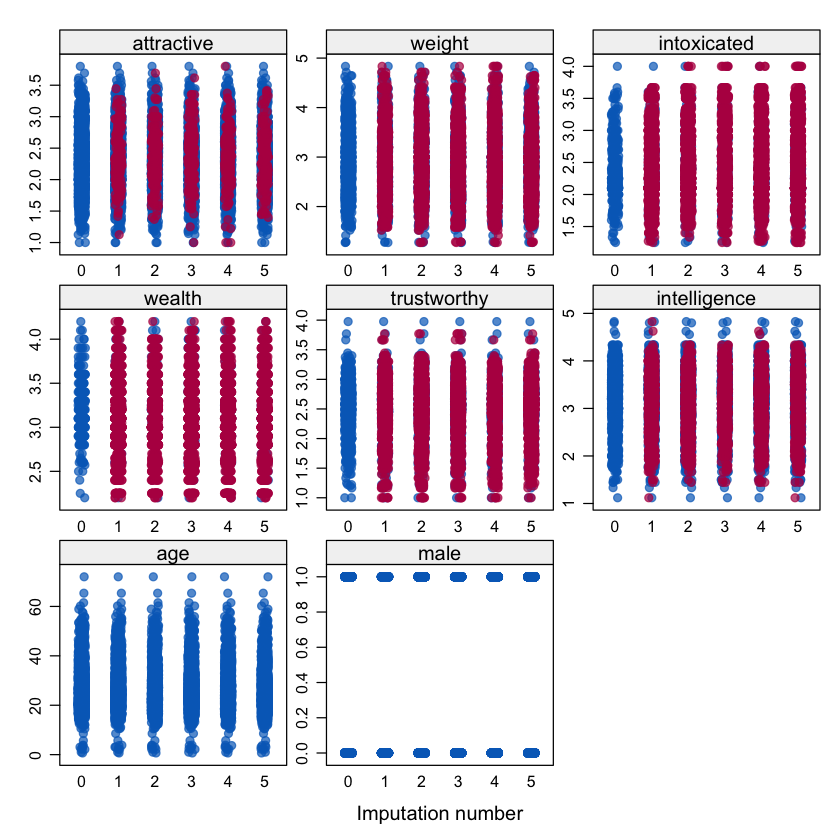

In [20]:
stripplot(temp_training_Data, pch = 20, cex = 1.2)

In [21]:
completed_mice_Data = complete(temp_training_Data)

In [22]:
#Mice did a good job at imputing data. No null data.
apply(data_training_1_drop_na, 2, function(x) sum(is.na(x)))

attractive       weight  intoxicated       wealth  trustworthy intelligence 
           0            0            0            0            0            0 
         age         male 
           0            0

In [23]:


#completed_training_Data = data_training_1
# save the outcome for the glmnet model
tempOutcome <- completed_mice_Data$male  


completed_mice_Data = transform( completed_mice_Data,  male = ifelse( unclass(male)==FALSE, 0, 1 ) )

completed_mice_Data$male = ifelse(completed_mice_Data$male==1,'yes','no')

outcomeName = 'male'
predictorsNames = names(completed_mice_Data)[names(completed_mice_Data) != outcomeName]

splitIndex = createDataPartition(completed_mice_Data[,outcomeName], p = .75, list = FALSE, times = 1)

trainDF    = completed_mice_Data[  splitIndex, ]
testDF     = completed_mice_Data[ -splitIndex, ] 


preProcValues <- preProcess(trainDF, method = c("BoxCox"))

trainTransformed <- predict(preProcValues, trainDF)
testTransformed <- predict(preProcValues, testDF)


In [24]:
prop.table(table(data_training_1$male))


FALSE  TRUE 
0.583 0.417 

In [25]:
trainTransformed

,attractive,weight,intoxicated,wealth,trustworthy,intelligence,age,male
1,2.777778,1.2469085,0.7840113,0.7884574,2.806122,3.990513,4.0753473,no
2,2.720000,1.4308338,0.8161393,1.0647108,2.828200,3.990513,4.6005940,no
3,2.181818,1.5924680,0.4080908,1.2527630,3.055556,5.687554,4.8666848,yes
4,2.441176,1.2919192,0.7276925,1.3083328,3.394587,5.822402,5.3131030,no
5,1.900000,1.1067498,0.9359230,1.0986123,3.219008,5.474650,4.3243960,no
7,2.222222,1.3796139,0.5151624,1.0986123,4.382812,4.334866,4.9828961,yes
8,1.333333,2.1210463,0.7370003,0.8109302,1.500000,1.255563,4.7824006,yes
9,1.909091,1.5612864,0.7871632,1.0296194,1.685950,1.611071,5.5336679,yes
10,2.909091,1.0483342,0.6651666,1.2809338,4.561984,7.246026,4.2626172,no
12,2.600000,1.2010717,0.5838400,1.3083328,4.000000,8.008780,4.3557632,no


In [26]:
#using train()
fitControl = trainControl(method='repeatedcv'
                          , number=3
                          , repeats = 3
                          , returnResamp='none'
                          , summaryFunction = twoClassSummary
                          , classProbs = TRUE)

In [27]:
gbm_model = suppressWarnings(train(trainDF[,predictorsNames], as.factor(trainDF[,outcomeName]), 
                  , method='gbm'
                  , trControl=fitControl
                  , metric = "ROC"
                  #,preProc = c("center")
                 ))

Loading required package: plyr


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3394             nan     0.1000    0.0089
     2        1.3259             nan     0.1000    0.0060
     3        1.3143             nan     0.1000    0.0059
     4        1.3068             nan     0.1000    0.0025
     5        1.2984             nan     0.1000    0.0037
     6        1.2933             nan     0.1000    0.0016
     7        1.2861             nan     0.1000    0.0034
     8        1.2801             nan     0.1000    0.0024
     9        1.2740             nan     0.1000    0.0021
    10        1.2690             nan     0.1000    0.0014
    20        1.2314             nan     0.1000    0.0003
    40        1.1893             nan     0.1000   -0.0004
    60        1.1647             nan     0.1000   -0.0003
    80        1.1461             nan     0.1000   -0.0001
   100        1.1304             nan     0.1000   -0.0006
   120        1.1192             nan     0.1000   -0.0002
   140        

,var,rel.inf
attractive,attractive,35.441834
trustworthy,trustworthy,22.054561
age,age,21.764129
intoxicated,intoxicated,10.541090
intelligence,intelligence,5.060776
wealth,wealth,3.181013
weight,weight,1.956596


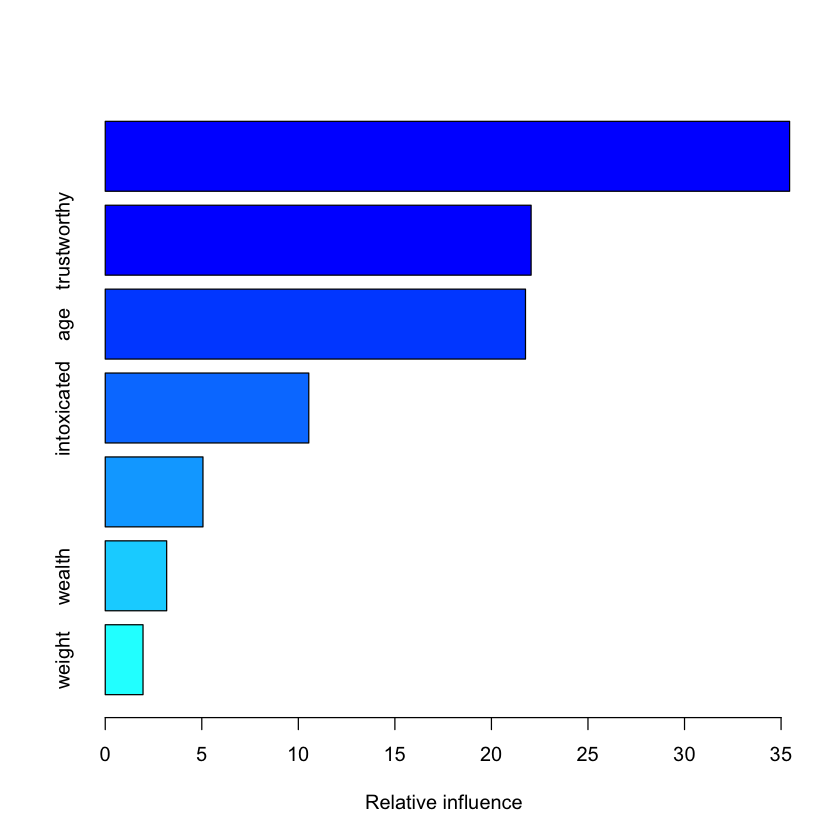

In [28]:
summary(gbm_model)



In [31]:
# class prediction
predictions = predict(object=gbm_model, testDF[,predictorsNames], type='raw')
postResample(pred=predictions, obs=as.factor(testDF[,outcomeName]))


Accuracy     Kappa 
0.7014028 0.3715950

In [32]:
# probabilities 
predictions_p = predict(object=gbm_model, testDF[,predictorsNames], type='prob')
postResample(pred=predictions_p[[2]], obs=ifelse(testDF[,outcomeName]=='yes',1,0))
auc <- roc(ifelse(testDF[,outcomeName]=="yes",1,0), predictions_p[[2]])
print(auc$auc)

RMSE  Rsquared 
0.4336571 0.2285911

Area under the curve: 0.7822


In [33]:
fitControl = trainControl(method='repeatedcv'
                          , number=5
                          , repeats = 10
                          , returnResamp='none'
                          , summaryFunction = twoClassSummary
                          , classProbs = TRUE)

In [34]:
gbmnet_model = suppressWarnings(train(trainDF[,predictorsNames]
                     , trainDF[,outcomeName]
                     , method='glmnet'
                     ,  metric = "ROC"
                     , trControl=fitControl))

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-10


Attaching package: ‘glmnet’

The following object is masked from ‘package:pROC’:

    auc



In [35]:
gbmnet_model

glmnet 

1501 samples
   7 predictor
   2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 1201, 1201, 1201, 1200, 1201, 1201, ... 
Resampling results across tuning parameters:

  alpha  lambda        ROC        Sens       Spec     
  0.10   0.0003004975  0.7287659  0.7968000  0.5072178
  0.10   0.0030049751  0.7287449  0.7973714  0.5053016
  0.10   0.0300497511  0.7264755  0.8098286  0.4608724
  0.55   0.0003004975  0.7287139  0.7965714  0.5076952
  0.55   0.0030049751  0.7283484  0.7972571  0.5033854
  0.55   0.0300497511  0.7197629  0.8219429  0.4282819
  1.00   0.0003004975  0.7286865  0.7961143  0.5080140
  1.00   0.0030049751  0.7280033  0.7985143  0.4995467
  1.00   0.0300497511  0.7125560  0.8289143  0.3896343

ROC was used to select the optimal model using  the largest value.
The final values used for the model were alpha = 0.1 and lambda = 0.0003004975.

In [36]:
predictions = predict(object=gbmnet_model, testDF[,predictorsNames])


In [37]:
# class prediction
predictions = predict(object=gbmnet_model, testDF[,predictorsNames], type='raw')
postResample(pred=predictions, obs=as.factor(testDF[,outcomeName]))



Accuracy     Kappa 
0.6953908 0.3502827

In [38]:
# probabilities 
predictions_p = predict(object=gbmnet_model, testDF[,predictorsNames], type='prob')
postResample(pred=predictions_p[[2]], obs=ifelse(testDF[,outcomeName]=='yes',1,0))
auc <- roc(ifelse(testDF[,outcomeName]=="yes",1,0), predictions_p[[2]])
print(auc$auc)

RMSE  Rsquared 
0.4318805 0.2368807

Area under the curve: 0.7893


In [39]:
rf_model = suppressWarnings(train(trainDF[,predictorsNames]
                     , trainDF[,outcomeName]
                     , method='ranger'
                     ,  metric = "ROC"
                     , trControl=fitControl))

In [40]:
rf_model

Random Forest 

1501 samples
   7 predictor
   2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 1201, 1201, 1200, 1201, 1201, 1201, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
  2     0.7145796  0.7747429  0.5401156
  4     0.7116687  0.7737143  0.5407644
  7     0.7075473  0.7686857  0.5342083

ROC was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2.

In [41]:
predictions = predict(object=rf_model, testDF[,predictorsNames])


In [42]:
# class prediction
predictions = predict(object=rf_model, testDF[,predictorsNames], type='raw')
postResample(pred=predictions, obs=as.factor(testDF[,outcomeName]))



Accuracy     Kappa 
0.7134269 0.3960525

In [43]:
# probabilities 
predictions_p = predict(object=gbmnet_model, testDF[,predictorsNames], type='prob')
postResample(pred=predictions_p[[2]], obs=ifelse(testDF[,outcomeName]=='yes',1,0))
auc <- roc(ifelse(testDF[,outcomeName]=="yes",1,0), predictions_p[[2]])
print(auc$auc)

RMSE  Rsquared 
0.4318805 0.2368807

Area under the curve: 0.7893


In [44]:
#names(getModelInfo())

In [45]:
data_test = read.csv("facestat_test.csv")

In [46]:
apply(data_test,2,pMiss)

talented              security               haircut 
            99.196787             99.598394             98.895582 
   sexual_orientation            attractive              dogfight 
            91.465863              7.630522             97.489960 
               weight political_affiliation                 rehab 
            52.610442             70.381526             99.698795 
      plastic_surgery           intoxicated                wealth 
            99.397590             76.305221             85.240964 
             age_well                outfit           trustworthy 
            99.497992             98.795181             60.542169 
           dress_size                  hire          intelligence 
            99.698795             99.297189             29.216867 
                  age                  male 
             0.000000            100.000000

In [47]:
data_test_1 = within(data_test, rm(
                                            talented
                                           , security
                                           , sexual_orientation
                                           , haircut
                                           , rehab
                                           , plastic_surgery
                                           , age_well
                                           , outfit
                                           , dress_size
                                           , hire
                                           , political_affiliation
                                           , dogfight
                                        )
                        )

In [48]:
head(data_test_1)

attractive,weight,intoxicated,wealth,trustworthy,intelligence,age,male
2.100000,3.526316,NA,NA,NA,3.866667,34.26316,NA
1.900000,2.285714,NA,NA,NA,2.857143,24.57143,NA
2.666667,2.750000,NA,NA,NA,NA,18.50000,NA
2.000000,3.875000,2.5,NA,2,3.000000,28.88889,NA
NA,2.400000,NA,NA,NA,3.200000,23.25000,NA
2.933333,NA,NA,NA,NA,3.615385,45.64286,NA


In [49]:
apply(data_test_1,2,pMiss)

attractive       weight  intoxicated       wealth  trustworthy intelligence 
    7.630522    52.610442    76.305221    85.240964    60.542169    29.216867 
         age         male 
    0.000000   100.000000

In [50]:
md.pattern(data_test_1)

,age,attractive,intelligence,weight,trustworthy,intoxicated,wealth,male,
137,1,1,1,1,1,1,1,0,1
65,1,1,1,1,1,1,0,0,2
1,1,1,1,0,1,0,1,0,3
3,1,1,1,0,1,1,0,0,3
13,1,1,1,1,1,0,0,0,3
1,1,1,1,1,0,0,1,0,3
1,1,1,1,1,0,1,0,0,3
1,1,0,1,0,1,0,1,0,4
1,1,0,1,1,1,0,0,0,4
102,1,1,1,0,1,0,0,0,4


In [51]:
# library(VIM)
# aggr_plot = aggr(data_test_1, col=c('navyblue','red'),
#                   numbers=TRUE, sortVars=TRUE,
#                   labels=names(data),
#                   cex.axis=.7,
#                   gap=3,
#                   ylab=c("Histogram of missing data","Pattern"))

In [52]:
temp_test_Data = mice(data_test_1,m=5,maxit=50,meth='pmm',seed=MY_UID)



 iter imp variable
  1   1  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  1   2  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  1   3  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  1   4  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  1   5  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  2   1  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  2   2  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  2   3  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  2   4  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  2   5  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  3   1  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  3   2  attractive  weight  intoxicated  wealth  trustworthy  intelligence
  3   3  attractive  weight  intoxicated  wealth  trustworthy  intel

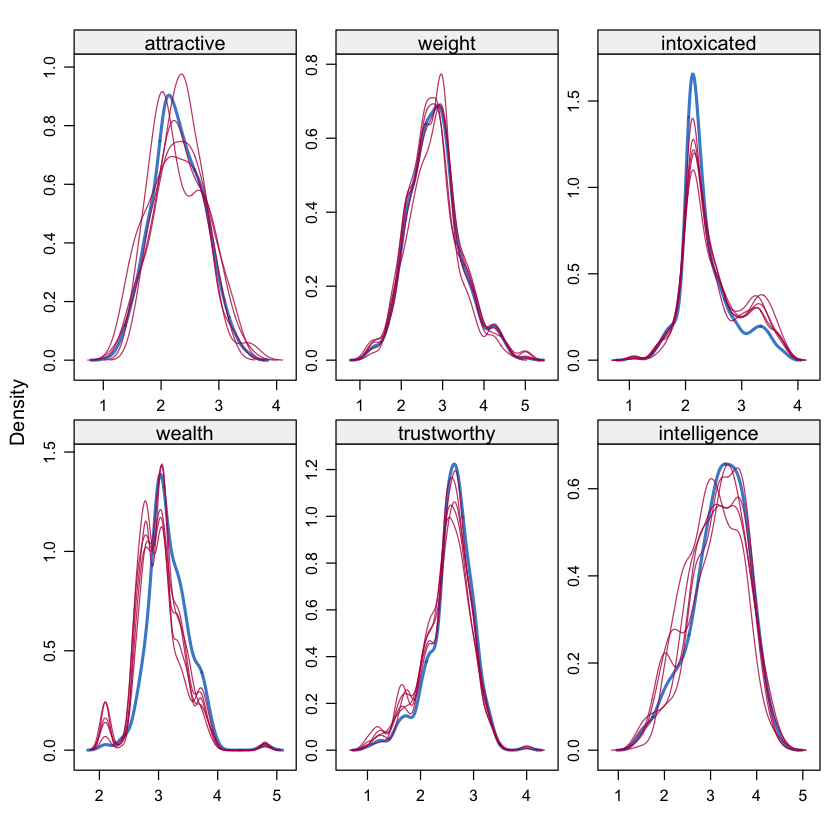

In [53]:
densityplot(temp_test_Data)

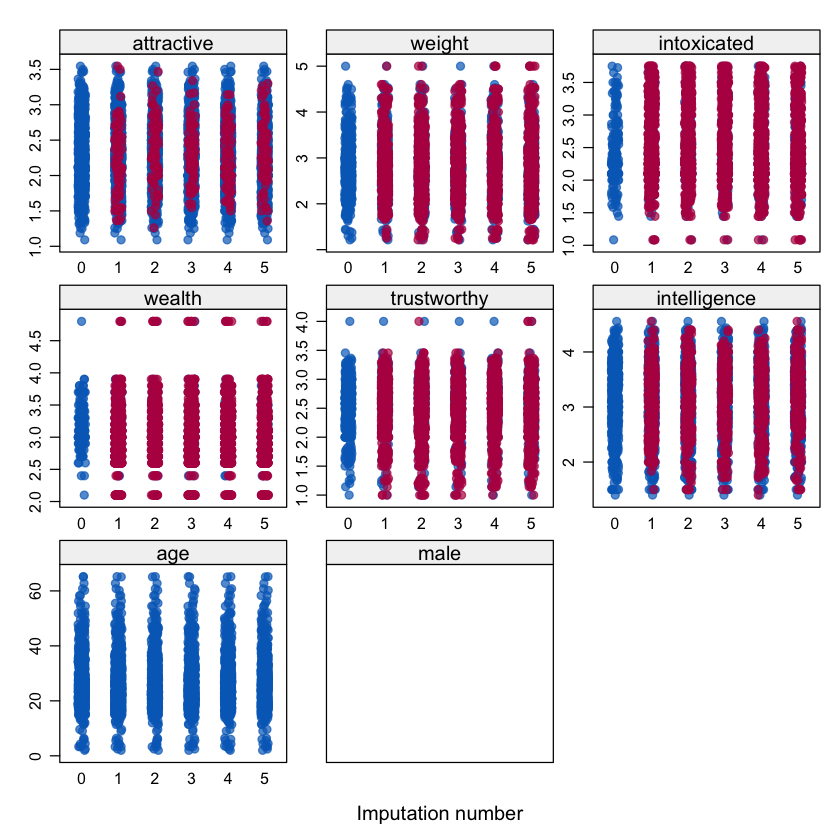

In [54]:
stripplot(temp_test_Data, pch = 20, cex = 1.2)

In [55]:
completed_mice_test_Data = complete(temp_test_Data)

#Mice did a good job at imputing data. No null data.
apply(completed_mice_test_Data, 2, function(x) sum(is.na(x)))

attractive       weight  intoxicated       wealth  trustworthy intelligence 
           0            0            0            0            0            0 
         age         male 
           0          996

In [56]:


#completed_training_Data = data_training_1
# save the outcome for the glmnet model
#tempOutcome <- completed_mice_test_Data$male  


completed_mice_test_Data = transform( completed_mice_test_Data,  male = ifelse( unclass(male)==FALSE, 0, 1 ) )

completed_mice_test_Data$male = ifelse(completed_mice_test_Data$male==1,'yes','no')

outcomeName = 'male'
predictorsNames = names(completed_mice_test_Data)[names(completed_mice_test_Data) != outcomeName]

splitIndex = createDataPartition(completed_mice_test_Data[,outcomeName], p = .75, list = FALSE, times = 1)

trainDF    = completed_mice_test_Data[  splitIndex, ]
testDF     = completed_mice_test_Data[ -splitIndex, ] 


preProcValues <- preProcess(trainDF, method = c("BoxCox"))

trainTransformed <- predict(preProcValues, trainDF)
testTransformed <- predict(preProcValues, testDF)


In [57]:
predictions = predict(object=gbm_model, testDF[,predictorsNames], type='raw')

In [58]:
predictions = ifelse(predictions=='yes','TRUE','FALSE')


In [623]:
for(i in predictions){
    cat(i, '\n')
}

FALSE 
FALSE 
TRUE 
FALSE 
TRUE 
TRUE 
TRUE 
FALSE 
TRUE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
TRUE 
FALSE 
FALSE 
FALSE 
FALSE 
TRUE 
FALSE 
FALSE 
FALSE 
TRUE 
TRUE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
TRUE 
FALSE 
FALSE 
TRUE 
FALSE 
FALSE 
TRUE 
TRUE 
TRUE 
TRUE 
FALSE 
TRUE 
TRUE 
FALSE 
TRUE 
TRUE 
FALSE 
FALSE 
FALSE 
TRUE 
FALSE 
TRUE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
TRUE 
TRUE 
FALSE 
TRUE 
TRUE 
TRUE 
TRUE 
TRUE 
FALSE 
FALSE 
FALSE 
TRUE 
TRUE 
TRUE 
FALSE 
TRUE 
FALSE 
FALSE 
FALSE 
TRUE 
FALSE 
FALSE 
TRUE 
FALSE 
FALSE 
FALSE 
TRUE 
FALSE 
TRUE 
FALSE 
TRUE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
TRUE 
TRUE 
TRUE 
FALSE 
TRUE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
TRUE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
TRUE 
TRUE 
FALSE 
FALSE 
FALSE 
TRUE 
TRUE 
TRUE 
FALSE 
FALSE 
FALSE 
TRUE 
FALSE 
FALSE 
FALSE 
TRUE 
TRUE 
FALSE 
FALSE 
FALSE 
FALSE 
TRUE 
TRUE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FALSE 
FA